In [1]:
import tensorflow as tf

In [3]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [7]:
(train_ds, train_labels), (_,_) = tf.keras.datasets.mnist.load_data()

In [12]:
train_ds.shape


(60000, 28, 28)

In [9]:
train_labels.shape

(60000,)

In [10]:
train_images = train_ds.reshape(train_ds.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [11]:
train_images.shape

(60000, 28, 28, 1)

In [13]:
buffer_size = 60000
batch_size = 256

In [14]:
train_ds = tf.data.Dataset.from_tensor_slices(train_images).shuffle(buffer_size).batch(batch_size)

In [17]:
train_ds.element_spec

TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)

# Creating the Generator

In [23]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Reshape((7,7,256)),

    tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
])

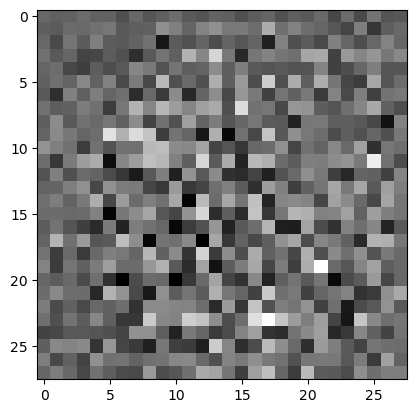

In [24]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [26]:
discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

In [ ]:
decision = discriminator(generated_image)
print (decision)